In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


Using TensorFlow backend.


[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

<tf.Tensor: shape=(4200, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

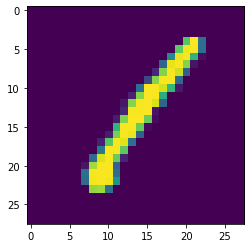

In [185]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

test= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

y_train= train.label
x_train= train.drop('label',axis=1)

x_train=x_train/255
test=test/255
y_train=tf.one_hot(y_train,axis=1,depth=10)





x_train=x_train.values.reshape(len(x_train),28,28,1)
test=test.values.reshape(-1,28,28,1)
print(test)

g = plt.imshow(x_train[0][:,:,0])
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)
tf.convert_to_tensor(x_train)
tf.convert_to_tensor(x_val)
tf.convert_to_tensor(y_train)
tf.convert_to_tensor(y_val)



In [195]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='same'),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           
                           tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                           tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
                           tf.keras.layers.Dropout(0.25),
                            
                           
                           
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           
                           
                           tf.keras.layers.Dense(20,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])

In [196]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss= 'categorical_crossentropy',metrics=['accuracy'])

In [204]:
datagen =ImageDataGenerator(rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,fill_mode='nearest')
datagen.fit(x_train)

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=86),epochs =2, validation_data=(x_val,y_val))

Epoch 1/2
440/440 [==============================] - 65s 149ms/step - loss: 0.6329 - accuracy: 0.8026 - val_loss: 0.2391 - val_accuracy: 0.9274
Epoch 2/2
440/440 [==============================] - 67s 151ms/step - loss: 0.3464 - accuracy: 0.8942 - val_loss: 0.1313 - val_accuracy: 0.9624


[[0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]
 [0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]
 [0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]
 ...
 [0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]
 [0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]
 [0.10746503 0.11328043 0.10106733 ... 0.09988765 0.09627689 0.10075849]]
0        1
1        1
2        1
3        1
4        1
        ..
27995    1
27996    1
27997    1
27998    1
27999    1
Name: Label, Length: 28000, dtype: int64


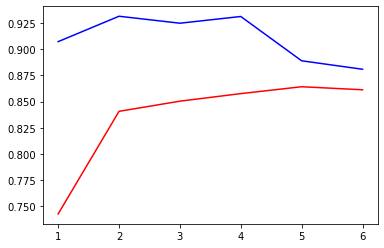

In [173]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

# predict results
results = model.predict(test)
print(results)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)
print(results)